# Đọc Dữ Liệu

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("DATA/Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Phân Tích Dữ Liệu

#### Xem kích thước bộ dữ liệu

In [3]:
df.shape

(2200, 8)

#### Xem thông tin bộ dữ liệu

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### Đếm khuyết

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

#### Thống kê mô tả

In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df_number = df.select_dtypes(include=['number'])
df_number

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


#### Thống kê sự tương quan dữ liệu giữa các cặp dữ liệu dạng số

In [9]:
corr = df_number.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


#### Vẽ biểu đồ ma trận tương quan heatmap

<Axes: >

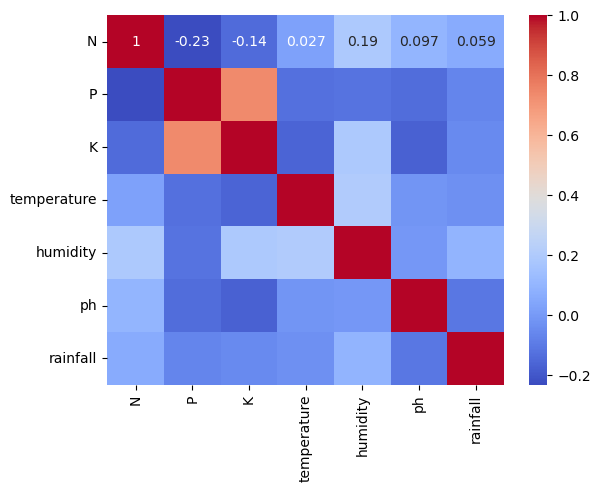

In [10]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True, cmap='coolwarm')

#### Đếm số nhãn của tập dữ liệu

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

#### Mã hóa những label đã có

In [15]:
crop_dict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}
df['crop_num']=df['label'].map(crop_dict)

#### Kiểm tra xem label về dạng số hết chưa

In [16]:
df['crop_num'].value_counts()

crop_num
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

In [17]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


#### Chia tập dữ liệu

In [18]:
X = df.drop(['crop_num','label'],axis=1)
y = df['crop_num']

In [19]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [20]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: crop_num, Length: 2200, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(1760, 7)

In [24]:
X_test.shape

(440, 7)

In [25]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [26]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [27]:
x_to_test = X_test

In [28]:
y_train

1656     7
752     16
892     15
1041    13
1179    12
        ..
1638     7
1095    13
1130    12
1294    11
860     15
Name: crop_num, Length: 1760, dtype: int64

#### chuẩn hóa dữ liệu

In [29]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train = scaler_minmax.fit_transform(X_train)
X_test = scaler_minmax.transform(X_test)

In [61]:
X_train

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [62]:
X_test

array([[0.72142857, 0.08571429, 0.21      , ..., 0.93872187, 0.41682113,
        0.021381  ],
       [0.7       , 0.02142857, 0.23      , ..., 0.84296447, 0.42837304,
        0.10449492],
       [0.42142857, 0.40714286, 0.22      , ..., 0.92264534, 0.5344578 ,
        0.33938901],
       ...,
       [0.86428571, 0.3       , 0.055     , ..., 0.75864563, 0.6560289 ,
        0.18741185],
       [0.82857143, 0.33571429, 0.07      , ..., 0.71286229, 0.40585322,
        0.16793744],
       [0.03571429, 0.45      , 0.075     , ..., 0.21974075, 0.40696371,
        0.48530014]])

Huấn luyện

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [65]:
model_NB = GaussianNB()
model_RF = RandomForestClassifier()
model_SVM = SVC()

In [85]:
model_NB.fit(X_train,y_train)
ypred_NB = model_NB.predict(X_test)
accuracy_NB = accuracy_score(y_test, ypred_NB)
print(f"GaussianNB with accuracy : {accuracy_NB}")

GaussianNB with accuracy : 0.9954545454545455


In [66]:
model_RF.fit(X_train,y_train)
ypred_RF = model_RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, ypred_RF)
print(f"RandomForestClassifier with accuracy : {accuracy_RF}")

RandomForestClassifier with accuracy : 0.9931818181818182


In [109]:
model_SVM.fit(X_train,y_train)
ypred_SVM = model_SVM.predict(X_test)
accuracy_SVM = accuracy_score(y_test, ypred_SVM)

print(f"Support Vector Machine with accuracy : {accuracy_SVM}")

Support Vector Machine with accuracy : 0.9681818181818181


In [110]:
with open('accuracy.txt', 'w') as file:
    file.write(f"GaussianNB with accuracy: {accuracy_NB}\n")
    file.write(f"RandomForestClassifier with accuracy: {accuracy_RF}\n")
    file.write(f"Support Vector Machine with accuracy: {accuracy_SVM}\n")

#### Lưu các mô hình

In [39]:
import pickle
# Lưu scaler 
with open('model/min_max_scaler.pkl', 'wb') as file:
    pickle.dump(scaler_minmax, file)


In [104]:
with open('model/GaussianNB_model.pkl', 'wb') as file:
    pickle.dump(model_NB, file)

In [67]:
with open('model/RandomForestClassifier_model.pkl', 'wb') as file:
    pickle.dump(model_RF, file)

In [112]:
with open('model/SVM_model.pkl', 'wb') as file:
    pickle.dump(model_SVM, file)

#### Dự báo 

#### Khi dự báo thì sẽ dự báo bằng tập X test, sau đó so sánh với kết quả trên y_test

In [113]:
x_to_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [114]:
y_pred_model_SVM = model_SVM.predict(X_test) # Sử dụng model của NB, có thể thay tùy ý
y_pred_model_SVM

array([ 9, 10,  6,  6,  8, 12,  8, 18, 17, 15, 16,  5, 14,  3,  5, 14,  8,
        2,  6,  9, 22,  6,  7,  6, 21,  3, 17,  7, 19,  1, 14, 15,  3, 15,
        3, 16,  3, 21, 21, 20,  6, 12, 16,  2, 17,  2, 19,  5,  9,  2, 16,
       22, 11, 17, 22, 20,  4,  8, 13, 15, 10,  5, 15,  7,  6, 16,  7,  1,
        9, 19,  9,  5,  3, 13, 16,  6, 13,  4, 10,  7, 22, 21,  3, 18,  7,
       12, 22, 18, 16, 14,  2, 18,  4,  6, 19, 18, 20, 22, 16, 15,  5,  3,
        7,  9, 10, 20, 10, 13, 19, 18, 13,  3,  4, 14, 19, 21,  2,  5, 14,
        1, 19, 11, 16,  5, 21, 16,  5,  2, 13, 18, 13, 20, 14, 21,  5,  7,
       19, 13, 13,  8, 20,  9, 17, 18,  5,  4,  8,  5, 20, 18, 17, 15, 10,
       17, 19, 19, 19, 20,  2,  3, 21,  8,  7,  4,  1,  5, 11, 15, 10, 11,
       11, 16, 14, 21,  5,  2, 15, 11, 10,  3, 22, 22, 20,  3, 18, 20, 13,
       20,  5,  6,  6, 17, 12, 14, 10, 20,  2,  8, 16, 21, 11, 11, 13,  4,
        1, 14, 17, 13,  3, 17,  2, 21, 21, 21,  8,  1, 20,  6, 22, 16, 20,
       12, 12,  5,  6,  8

In [115]:
y_test

1451     9
1334    10
1761     6
1735     6
1576     8
        ..
59       1
71       1
1908     4
1958     4
482     19
Name: crop_num, Length: 440, dtype: int64

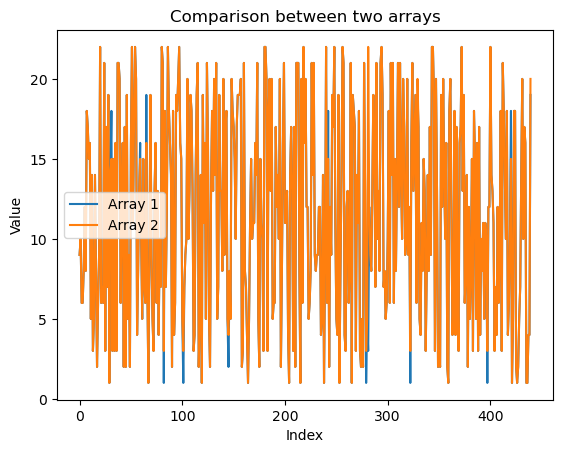

In [117]:
# Vẽ biểu đồ
import matplotlib.pyplot as plt
array1 = np.array(y_test)
array2 = y_pred_model_SVM
plt.plot(array1, label='Array 1')
plt.plot(array2, label='Array 2')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison between two arrays')
plt.legend()
plt.show()

c:\Users\DELL\anaconda3\envs\ccc\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\envs\ccc\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


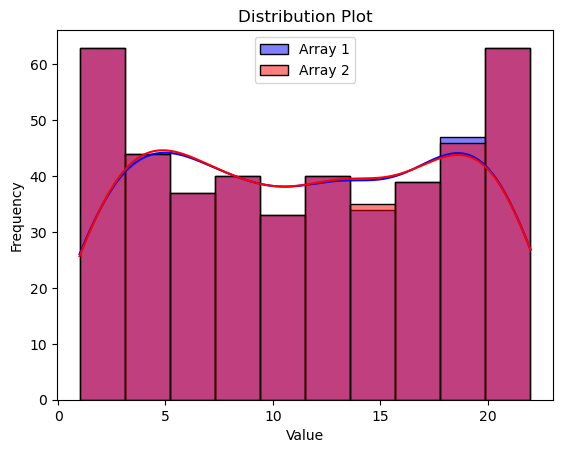

In [72]:
# Vẽ biểu đồ phân phối
sns.histplot(array1, color='blue', kde=True, label='Array 1')
sns.histplot(array2, color='red', kde=True, label='Array 2')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')
plt.legend()
plt.show()

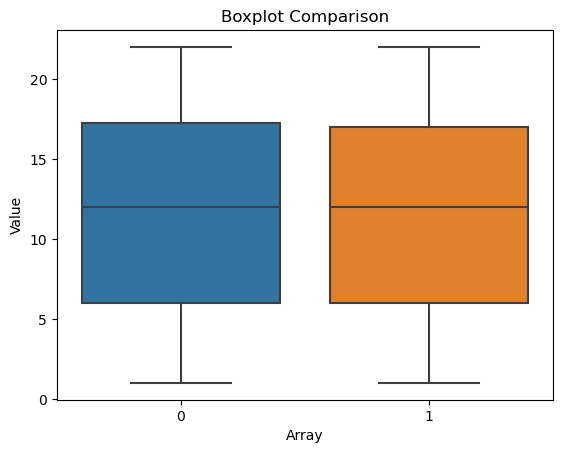

In [73]:
# Vẽ biểu đồ Boxplot
sns.boxplot(data=[array1, array2])
plt.xlabel('Array')
plt.ylabel('Value')
plt.title('Boxplot Comparison')
plt.show()

In [48]:
N = 101	
P = 17
k = 47
temperature = 29.494014	
humidity = 94.729813	
ph = 6.185053	
rainfall = 26.308209
# Tạo list từ các giá trị đã cho
my_list = [N, P, k, temperature, humidity, ph, rainfall]

print(my_list)

[101, 17, 47, 29.494014, 94.729813, 6.185053, 26.308209]


### Thử nghiệm trên mô hình Naive Bayes

In [49]:
scaler_data = scaler_minmax.transform([my_list])
predict = model_NB.predict(scaler_data)
predict[0]

c:\Users\DELL\anaconda3\envs\ccc\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


9

In [50]:
crop_dict 

{'rice': 1,
 'maize': 2,
 'jute': 3,
 'cotton': 4,
 'coconut': 5,
 'papaya': 6,
 'orange': 7,
 'apple': 8,
 'muskmelon': 9,
 'watermelon': 10,
 'grapes': 11,
 'mango': 12,
 'banana': 13,
 'pomegranate': 14,
 'lentil': 15,
 'blackgram': 16,
 'mungbean': 17,
 'mothbeans': 18,
 'pigeonpeas': 19,
 'kidneybeans': 20,
 'chickpea': 21,
 'coffee': 22}

In [54]:
def convert_number_to_crop_name(number):
    for crop, num in crop_dict.items():
        if num == number:
            return crop
    return "Unknown"

# Ví dụ: Chuyển đổi số 1 thành tên cây trồng tương ứng
crop_name = convert_number_to_crop_name(predict[0])
print("cây trồng gợi ý là:", crop_name)

cây trồng gợi ý là: muskmelon
